In [1]:
from collections import Counter
import seaborn as sns
import pandas as pd

import  matplotlib.pyplot as plt
import plotly.graph_objects as go

from nltk import word_tokenize 
from nltk.util import ngrams

In [2]:
df = pd.read_csv("../data/ecommerceDataset_clean.csv")
df.head(3)

,index,labels,descriptions,desc_clean
0,0,Household,Paper Plane Design Framed Wall Hanging Motivat...,paper plane design frame wall hang motivationa...
1,1,Household,"SAF 'Floral' Framed Painting (Wood, 30 inch x ...",saf floral frame paint wood inch inch special ...
2,2,Household,SAF 'UV Textured Modern Art Print Framed' Pain...,saf texture modern art print frame paint synth...


In [6]:
# df = pd.read_csv("../data/ecommerceDataset.csv", names=["labels", "descriptions"])
# df.labels.value_counts()

In [3]:
df.labels.value_counts()

Household                 19313
Books                     11820
Electronics               10621
Clothing & Accessories     8670
Name: labels, dtype: int64

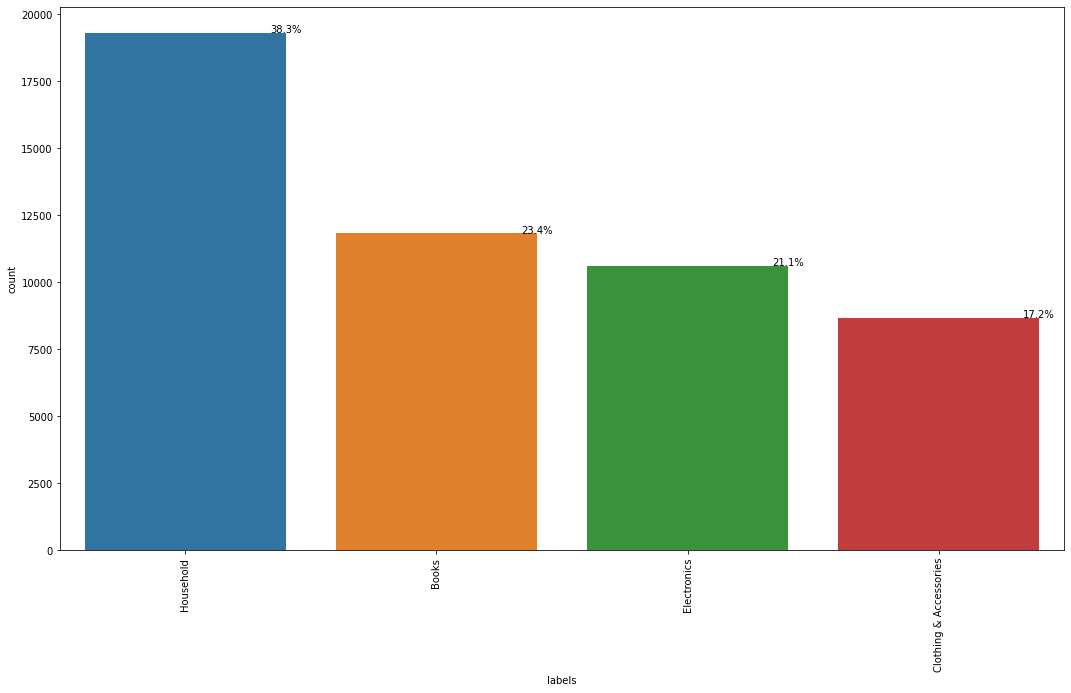

In [12]:
fig = plt.figure(figsize=(18, 10))
ax = sns.countplot(x="labels", data=df, order=df["labels"].value_counts().index)
ax.tick_params(axis="x", rotation=90)


total = float(len(df))
for p in ax.patches:
    percentage = "{:.1f}%".format(100 * p.get_height()/total)
    x = p.get_x() + p.get_width()
    y = p.get_height()
    ax.annotate(percentage, (x, y), ha="center")
plt.show()

In [3]:
def get_ngrams(text, n):
    ngram = []
    for line in text:
        token = word_tokenize(line)
        ngram.extend([ " ".join(item) for item in ngrams(token, n)])
    return ngram

In [4]:
def get_bar_ngrams(text, thematique, color, n=2, top_n=20):
    all_bigrams = get_ngrams(text, n)
    topbigrams = Counter(all_bigrams).most_common(top_n)
    
    labels = list(reversed([_[0] for _ in topbigrams]))
    values = list(reversed([_[1] for _ in topbigrams]))

    trace = go.Bar(x=values, y=labels, marker=dict(color=color), orientation="h")
    fig = go.Figure(trace)
    fig.update_layout(height=500, title="Top bigrams: " + thematique)
    fig.show()

In [5]:
colors = ["#4286f4", "#f44268", "#e0d75e", "#3e8441"]

for thematique, color in zip(df["labels"].unique(), colors):
    corpus = df.loc[(df["labels"] == thematique), "desc_clean"].map(str).values 
    get_bar_ngrams(corpus, thematique=thematique, color=color, n=2)